In [404]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [405]:
df = pd.read_csv('drug200.csv')

In [406]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [407]:
df.size

1200

In [408]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [409]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Pairplot

<Figure size 1440x1440 with 0 Axes>

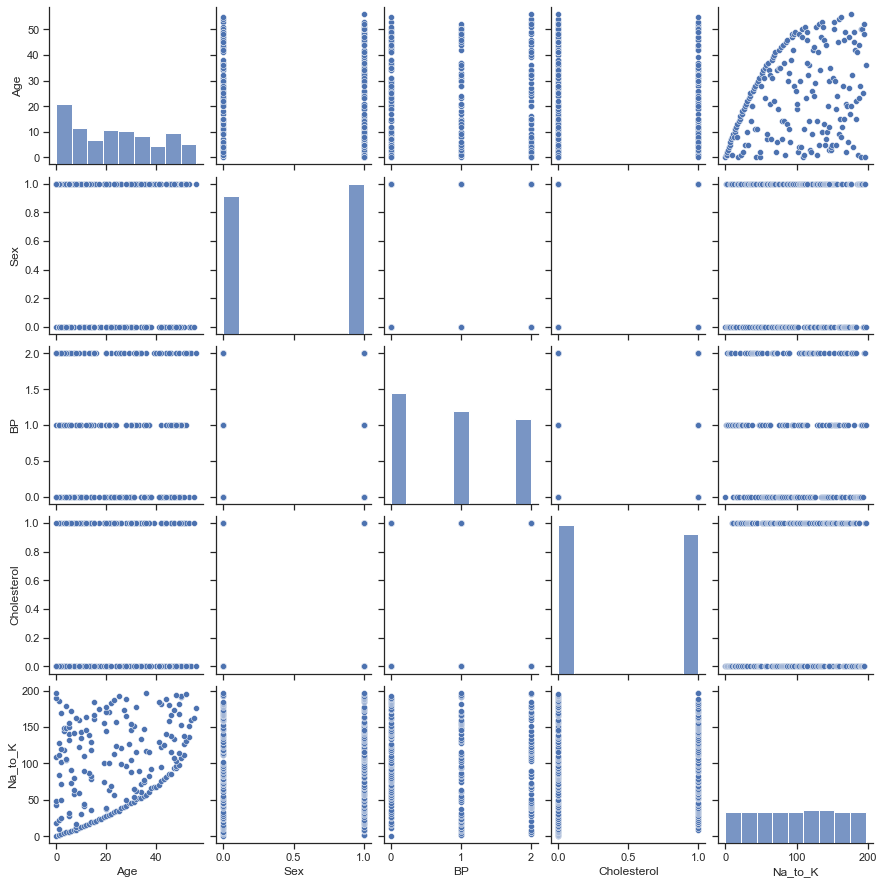

In [410]:
plt.figure(figsize=(20, 20))
sns.pairplot(df.apply(lambda x: pd.factorize(x)[0]).iloc[:, [x for x in range(0, 5)]])
plt.show()

# HeatMap

<AxesSubplot:>

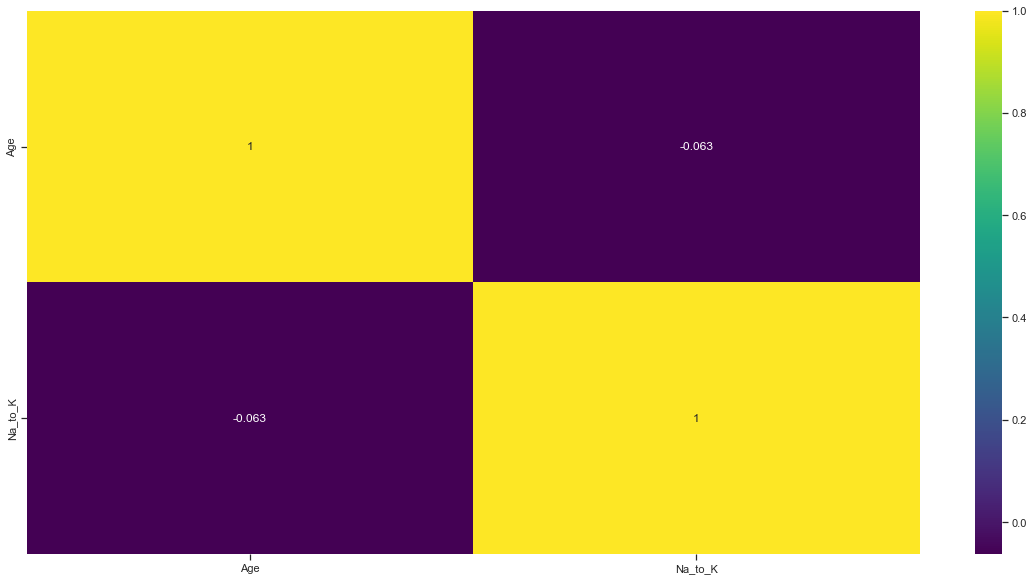

In [411]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

# Boxplot

<AxesSubplot:xlabel='Age'>

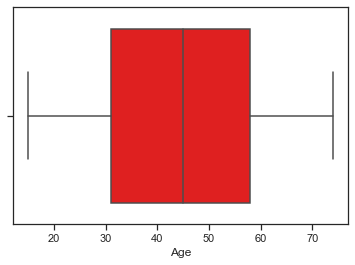

In [412]:
sns.boxplot(x='Age', data=df, color='Red')

<AxesSubplot:xlabel='Na_to_K'>

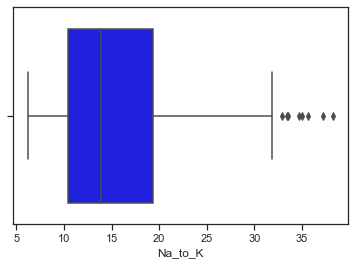

In [413]:
sns.boxplot(x='Na_to_K', data=df, color='Blue')

# LabelEncoder
##### Используется для преобразования категориальных или текстовых данных в числа, которые наши предсказательные модели понимают лучше.

In [414]:
from sklearn.preprocessing import LabelEncoder


#function to label
def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])


#create a list of data needed to be labeled
categories = ['Sex', 'BP', 'Cholesterol', 'Drug']

for label in categories:
    label_encoder(label)

<AxesSubplot:>

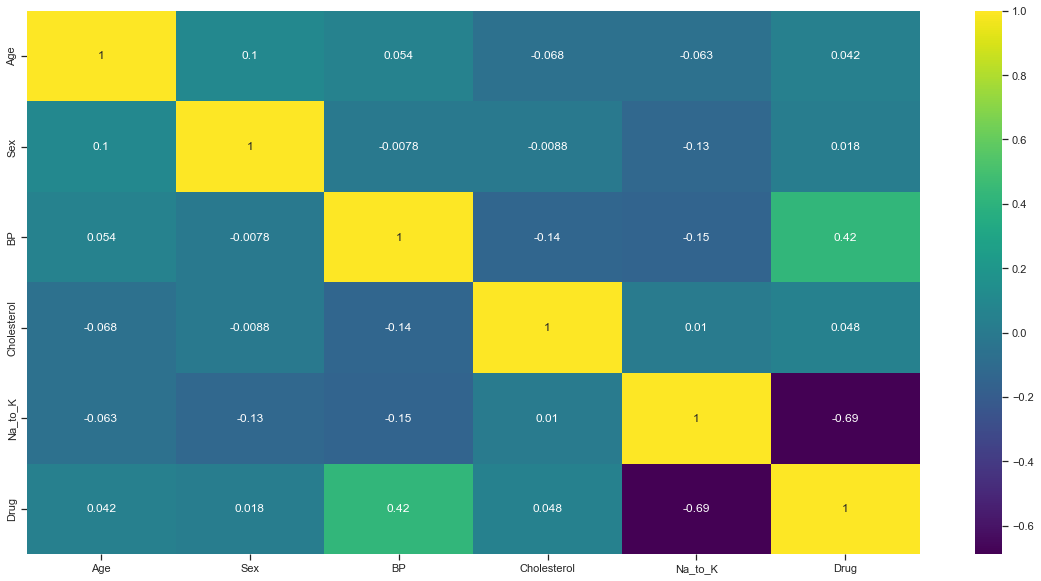

In [415]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

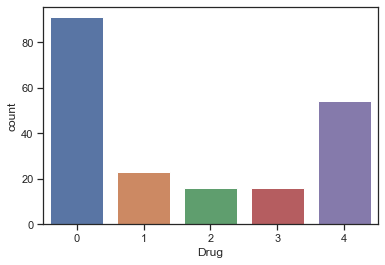

In [416]:
sns.countplot(x='Drug', data=df)
plt.show()

# TrainTestSplit

In [417]:
from sklearn.model_selection import train_test_split

X = df.drop('Drug', axis=1)
Y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
#Display shape of training and testing data
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('data', df.shape)

X_train (160, 5)
X_test (40, 5)
y_train (160,)
y_test (40,)
data (200, 6)


# KNeighborsClassifier

In [418]:
from sklearn.preprocessing import StandardScaler

#Standardize the Variables
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

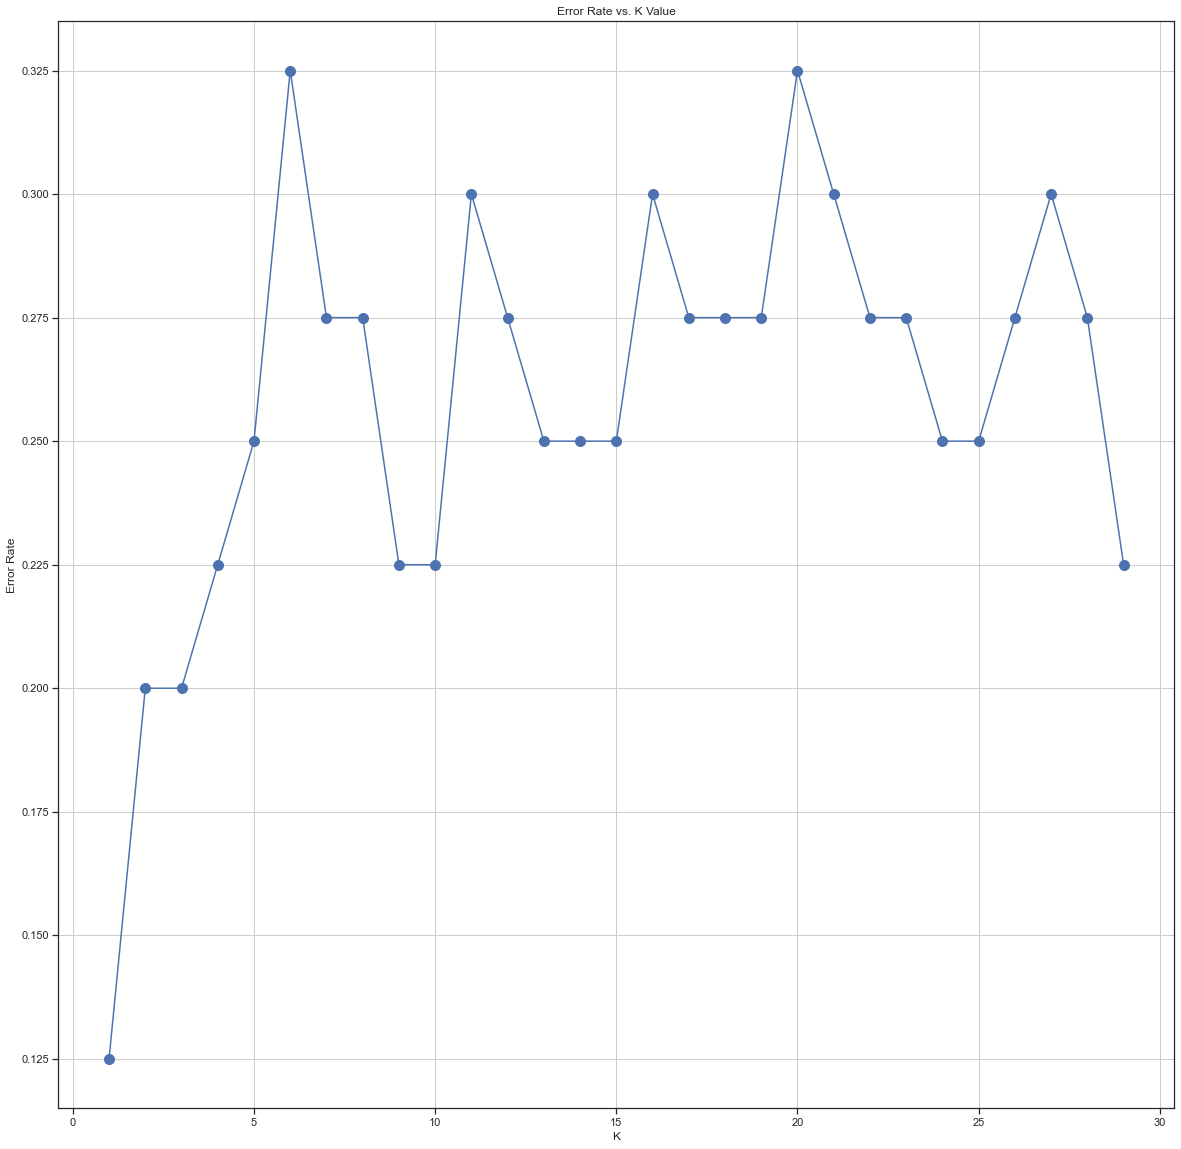

In [419]:
# Choosing a K Value
error_rate = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(20, 20))
plt.plot(range(1, 30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [420]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

In [421]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       1.00      1.00      1.00         5
           2       0.67      1.00      0.80         2
           3       1.00      0.71      0.83         7
           4       0.82      1.00      0.90         9

    accuracy                           0.88        40
   macro avg       0.87      0.91      0.88        40
weighted avg       0.89      0.88      0.87        40

[[14  0  1  0  2]
 [ 0  5  0  0  0]
 [ 0  0  2  0  0]
 [ 2  0  0  5  0]
 [ 0  0  0  0  9]]


In [422]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred))

0.875


# Decision Tree

In [423]:
from sklearn.tree import DecisionTreeClassifier

In [424]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X, Y)
pred = tree.predict(X_test)

In [425]:
print(accuracy_score(y_test, pred))

1.0


In [426]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         9

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[17  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  9]]


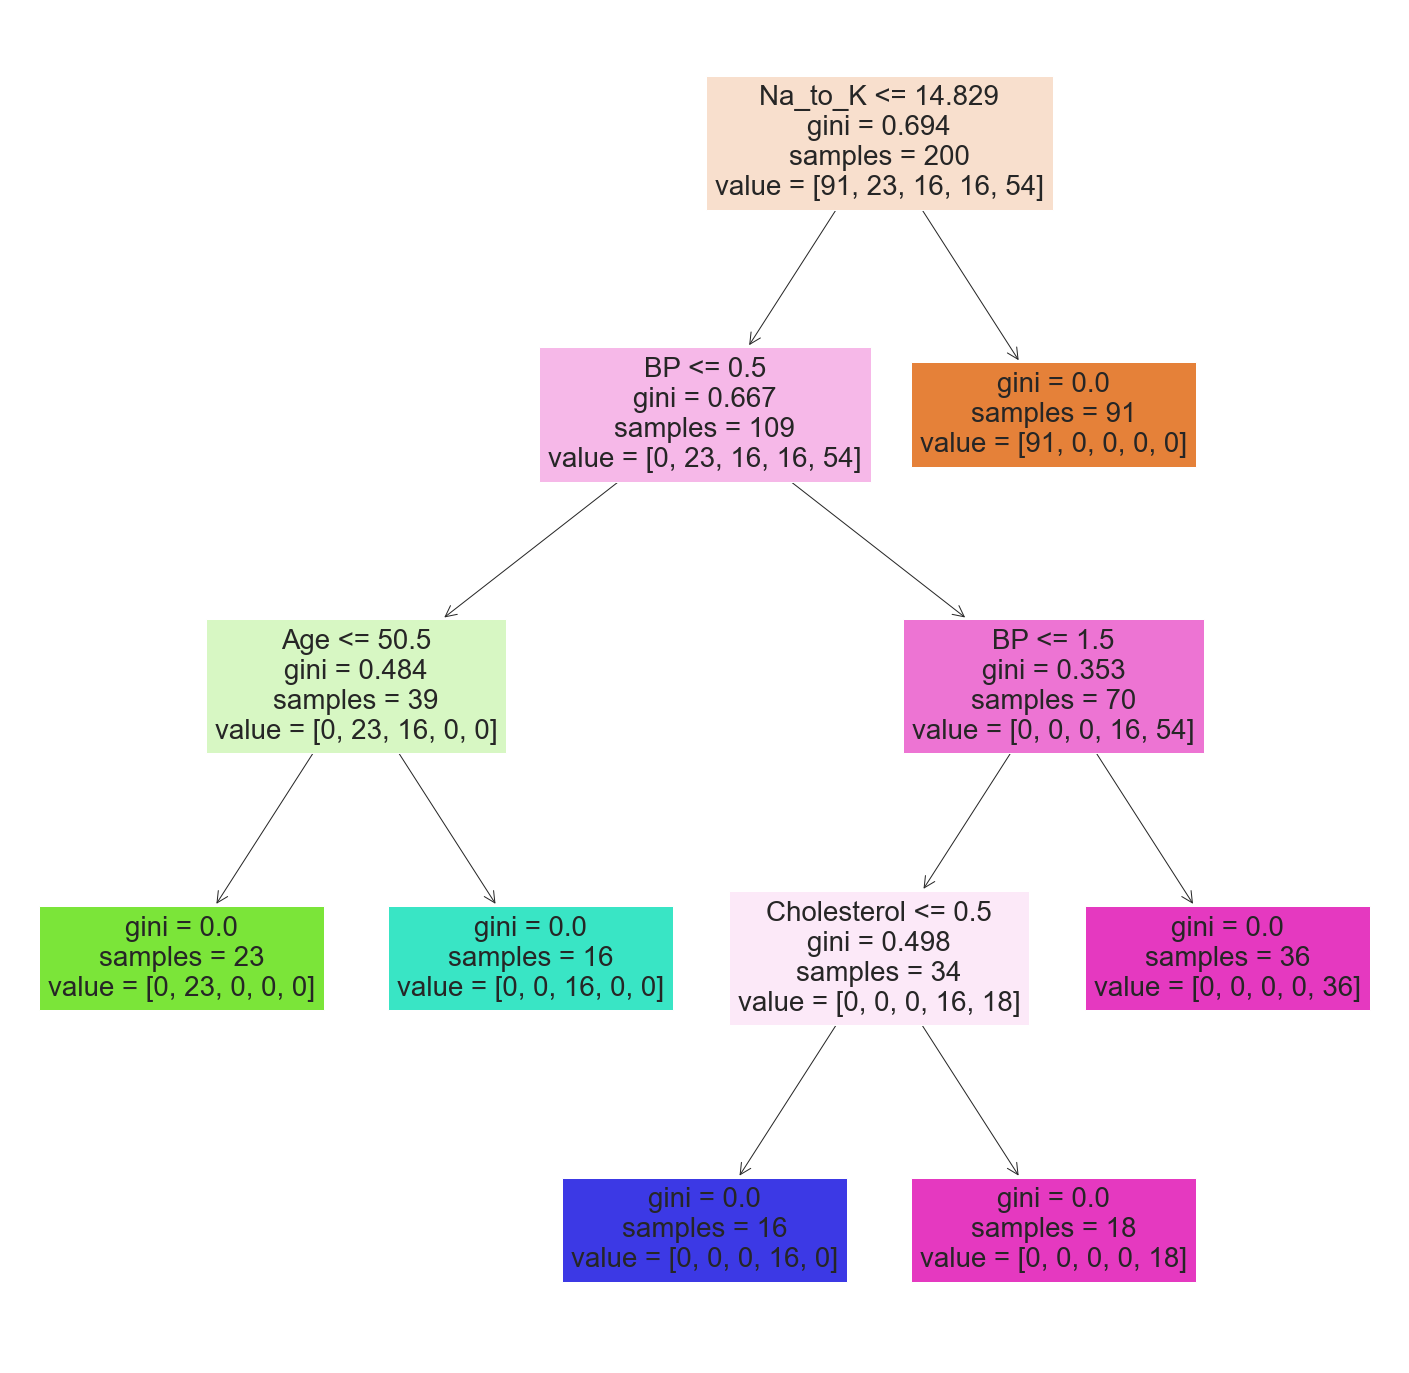

In [427]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 25))
plot_tree(tree, filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'] )
plt.show()

# SVM

In [428]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
gs = GridSearchCV(SVC(), param_grid)
k = gs.fit(X_train, y_train)
print("accuracy  =", k.best_score_)
print("С =", k.best_params_['C'], "gamma =", k.best_params_['gamma'], "kernel =", k.best_params_['kernel'])

accuracy  = 0.95625
С = 1000 gamma = 0.001 kernel = rbf


In [429]:
from sklearn import metrics

model = SVC(kernel=k.best_params_['kernel'], C=k.best_params_['C'], gamma=k.best_params_['gamma'])
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred, y_test))

0.95


In [430]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       0.86      0.86      0.86         7
           4       0.89      0.89      0.89         9

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

[[17  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  6  1]
 [ 0  0  0  1  8]]


# RandomForest

In [431]:
from sklearn.ensemble import RandomForestClassifier

grid_params = {'max_depth': np.arange(1, 10), 'n_estimators': [150, 200, 250, 300]}
gs = GridSearchCV(RandomForestClassifier(), grid_params)
k = gs.fit(X_train, y_train)
print("accuracy =", k.best_score_)
print("max_depth =", k.best_params_['max_depth'], "n_estimators =", k.best_params_['n_estimators'])

accuracy = 0.9875
max_depth = 6 n_estimators = 150


In [432]:
model = RandomForestClassifier(max_depth=k.best_params_['max_depth'], n_estimators=k.best_params_['n_estimators'])
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred, y_test))

0.975


In [433]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      0.86      0.92         7
           4       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

[[17  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  6  1]
 [ 0  0  0  0  9]]


# AdaBoost


In [434]:
from sklearn.ensemble import AdaBoostClassifier

grid_params = {'learning_rate':np.arange(0.2,1,0.2),'n_estimators': np.arange(50,200,50)}
gs = GridSearchCV(AdaBoostClassifier(), grid_params)
k = gs.fit(X_train,y_train)
print("accuracy =",k.best_score_)
print("learning_rate =",k.best_params_['learning_rate'], "n_estimators =", k.best_params_['n_estimators'])


accuracy = 0.85
learning_rate = 0.2 n_estimators = 50


In [435]:
model = AdaBoostClassifier(learning_rate = k.best_params_['learning_rate'], n_estimators = k.best_params_['n_estimators'])
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred,y_test))


0.775


In [436]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred ))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.71      1.00      0.83         5
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         7
           4       0.56      1.00      0.72         9

    accuracy                           0.78        40
   macro avg       0.46      0.60      0.51        40
weighted avg       0.64      0.78      0.69        40

[[17  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  0  0  7]
 [ 0  0  0  0  9]]


c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# Дякую за увагу <3